Modelo 2

¿Cuál es el canal de contacto más efectivo para maximizar la conversión de ventas? 

Features:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


Variable Objetivo:

y - has the client subscribed a term deposit? (binary: "yes","no")

In [54]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [55]:
file_path = r'C:\Users\Carlos Andres\Desktop\Proyecto2\Modelamiento\Bank.csv'

# Leer el archivo CSV con el delimitador ";"
df = pd.read_csv(file_path, delimiter=',')

# Mostrar las primeras filas para verificar que se haya cargado correctamente
print(df.head())


   age           job  marital  education  balance  housing  loan  contact  \
0   58    management  married   tertiary     2143        1     0  unknown   
1   44    technician   single  secondary       29        1     0  unknown   
2   33  entrepreneur  married  secondary        2        1     1  unknown   
3   47   blue-collar  married    unknown     1506        1     0  unknown   
4   33       unknown   single    unknown        1        0     0  unknown   

   day month  duration  campaign  pdays poutcome  y  
0    5   may       261         1     -1  unknown  0  
1    5   may       151         1     -1  unknown  0  
2    5   may        76         1     -1  unknown  0  
3    5   may        92         1     -1  unknown  0  
4    5   may       198         1     -1  unknown  0  


In [56]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,y
0,58,management,married,tertiary,2143,1,0,unknown,5,may,261,1,-1,unknown,0
1,44,technician,single,secondary,29,1,0,unknown,5,may,151,1,-1,unknown,0
2,33,entrepreneur,married,secondary,2,1,1,unknown,5,may,76,1,-1,unknown,0
3,47,blue-collar,married,unknown,1506,1,0,unknown,5,may,92,1,-1,unknown,0
4,33,unknown,single,unknown,1,0,0,unknown,5,may,198,1,-1,unknown,0


In [57]:
cat_int_feats = [ ]

In [58]:
cat_str_feats = ['contact', 'poutcome', 'month']

In [59]:
num_feats = ['duration','campaign','day','pdays']

In [60]:
feats_ordered = cat_int_feats+cat_str_feats+num_feats

In [61]:
df = df[feats_ordered+['y']]

In [62]:
df.head()

,contact,poutcome,month,duration,campaign,day,pdays,y
0,unknown,unknown,may,261,1,5,-1,0
1,unknown,unknown,may,151,1,5,-1,0
2,unknown,unknown,may,76,1,5,-1,0
3,unknown,unknown,may,92,1,5,-1,0
4,unknown,unknown,may,198,1,5,-1,0


In [63]:
train = df.sample(frac=0.7, random_state=100)
train.head()

,contact,poutcome,month,duration,campaign,day,pdays,y
14789,cellular,unknown,jul,154,2,16,-1,0
8968,unknown,unknown,jun,178,1,5,-1,0
34685,cellular,unknown,may,67,4,5,-1,0
2369,unknown,unknown,may,203,1,13,-1,0
36561,cellular,success,may,631,1,12,344,0


In [64]:
train.shape

(31648, 8)

In [65]:
test = df.drop(train.index)
test.head()

,contact,poutcome,month,duration,campaign,day,pdays,y
0,unknown,unknown,may,261,1,5,-1,0
9,unknown,unknown,may,55,1,5,-1,0
10,unknown,unknown,may,222,1,5,-1,0
15,unknown,unknown,may,353,1,5,-1,0
17,unknown,unknown,may,38,1,5,-1,0


In [66]:
val = train.sample(frac=0.2, random_state=100)

In [67]:
val.shape

(6330, 8)

In [68]:
train = train.drop(val.index)

In [69]:
print(train.shape)
print(val.shape)
print(test.shape)

(25318, 8)
(6330, 8)
(13563, 8)


In [70]:
train.describe()

,duration,campaign,day,pdays,y
count,25318.000000,25318.000000,25318.000000,25318.000000,25318.000000
mean,258.680188,2.758512,15.811675,41.054704,0.116873
std,259.833155,3.092315,8.339472,100.830245,0.321276
min,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,103.000000,1.000000,8.000000,-1.000000,0.000000
50%,180.000000,2.000000,16.000000,-1.000000,0.000000
75%,319.000000,3.000000,21.000000,-1.000000,0.000000
max,4918.000000,63.000000,31.000000,854.000000,1.000000


In [71]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("y")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [72]:
train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)

In [73]:
print(train_ds)

<_ShuffleDataset element_spec=({'contact': TensorSpec(shape=(), dtype=tf.string, name=None), 'poutcome': TensorSpec(shape=(), dtype=tf.string, name=None), 'month': TensorSpec(shape=(), dtype=tf.string, name=None), 'duration': TensorSpec(shape=(), dtype=tf.int64, name=None), 'campaign': TensorSpec(shape=(), dtype=tf.int64, name=None), 'day': TensorSpec(shape=(), dtype=tf.int64, name=None), 'pdays': TensorSpec(shape=(), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [74]:
type(train_ds)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [75]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("y:", y)

Input: {'contact': <tf.Tensor: shape=(), dtype=string, numpy=b'unknown'>, 'poutcome': <tf.Tensor: shape=(), dtype=string, numpy=b'unknown'>, 'month': <tf.Tensor: shape=(), dtype=string, numpy=b'jun'>, 'duration': <tf.Tensor: shape=(), dtype=int64, numpy=27>, 'campaign': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'day': <tf.Tensor: shape=(), dtype=int64, numpy=20>, 'pdays': <tf.Tensor: shape=(), dtype=int64, numpy=-1>}
y: tf.Tensor(0, shape=(), dtype=int64)


In [76]:
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [77]:
def encode_numerical_feature(feature, name, dataset):
    # Crea capa de normalización para este feature
    normalizer = keras.layers.Normalization()

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende las estadísticas de los datos (media, varianza)
    normalizer.adapt(feature_ds)

    # Aplica la normalización a la variable
    encoded_feature = normalizer(feature)
    return encoded_feature

In [78]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

In [79]:
inputs = []
for i in cat_int_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))

In [80]:
for i in cat_str_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))

In [81]:
for i in num_feats:
  inputs.append(keras.Input(shape=(1,), name=i))

In [82]:
for i in inputs:
   print(i)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.string, name='contact'), name='contact', description="created by layer 'contact'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.string, name='poutcome'), name='poutcome', description="created by layer 'poutcome'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.string, name='month'), name='month', description="created by layer 'month'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='duration'), name='duration', description="created by layer 'duration'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='campaign'), name='campaign', description="created by layer 'campaign'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='day'), name='day', description="created by layer 'day'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='pdays'), name='pdays', description="created by layer 'pdays'")


In [83]:
feats_encoded=[]

In [84]:
for i,feat in enumerate(cat_int_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[i], feat, train_ds, False)
  )

In [85]:
len_feats = len(feats_encoded)
len_feats

0

In [86]:
for i,feat in enumerate(cat_str_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[len_feats+i], feat, train_ds, True)
  )

In [87]:
len_feats = len(feats_encoded)
len_feats

3

In [88]:
for i,feat in enumerate(num_feats):
  feats_encoded.append(
      encode_numerical_feature(inputs[len_feats+i], feat, train_ds)
  )

In [89]:
for i in feats_encoded:
  print(i)

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='string_lookup_3/bincount/DenseBincount:0', description="created by layer 'string_lookup_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), name='string_lookup_4/bincount/DenseBincount:0', description="created by layer 'string_lookup_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 13), dtype=tf.float32, name=None), name='string_lookup_5/bincount/DenseBincount:0', description="created by layer 'string_lookup_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='normalization_1/truediv:0', description="created by layer 'normalization_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='normalization_2/truediv:0', description="created by layer 'normalization_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='normalization_3/truediv:0', description="created

In [90]:
all_feats = keras.layers.concatenate(feats_encoded)

In [91]:
type(all_feats)

keras.src.engine.keras_tensor.KerasTensor

In [92]:
model_layers = keras.layers.Dense(32, activation='relu')(all_feats)

In [93]:
model_layers = keras.layers.Dense(1, activation='tanh')(model_layers)

In [94]:
model = keras.Model(inputs, model_layers)

In [95]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

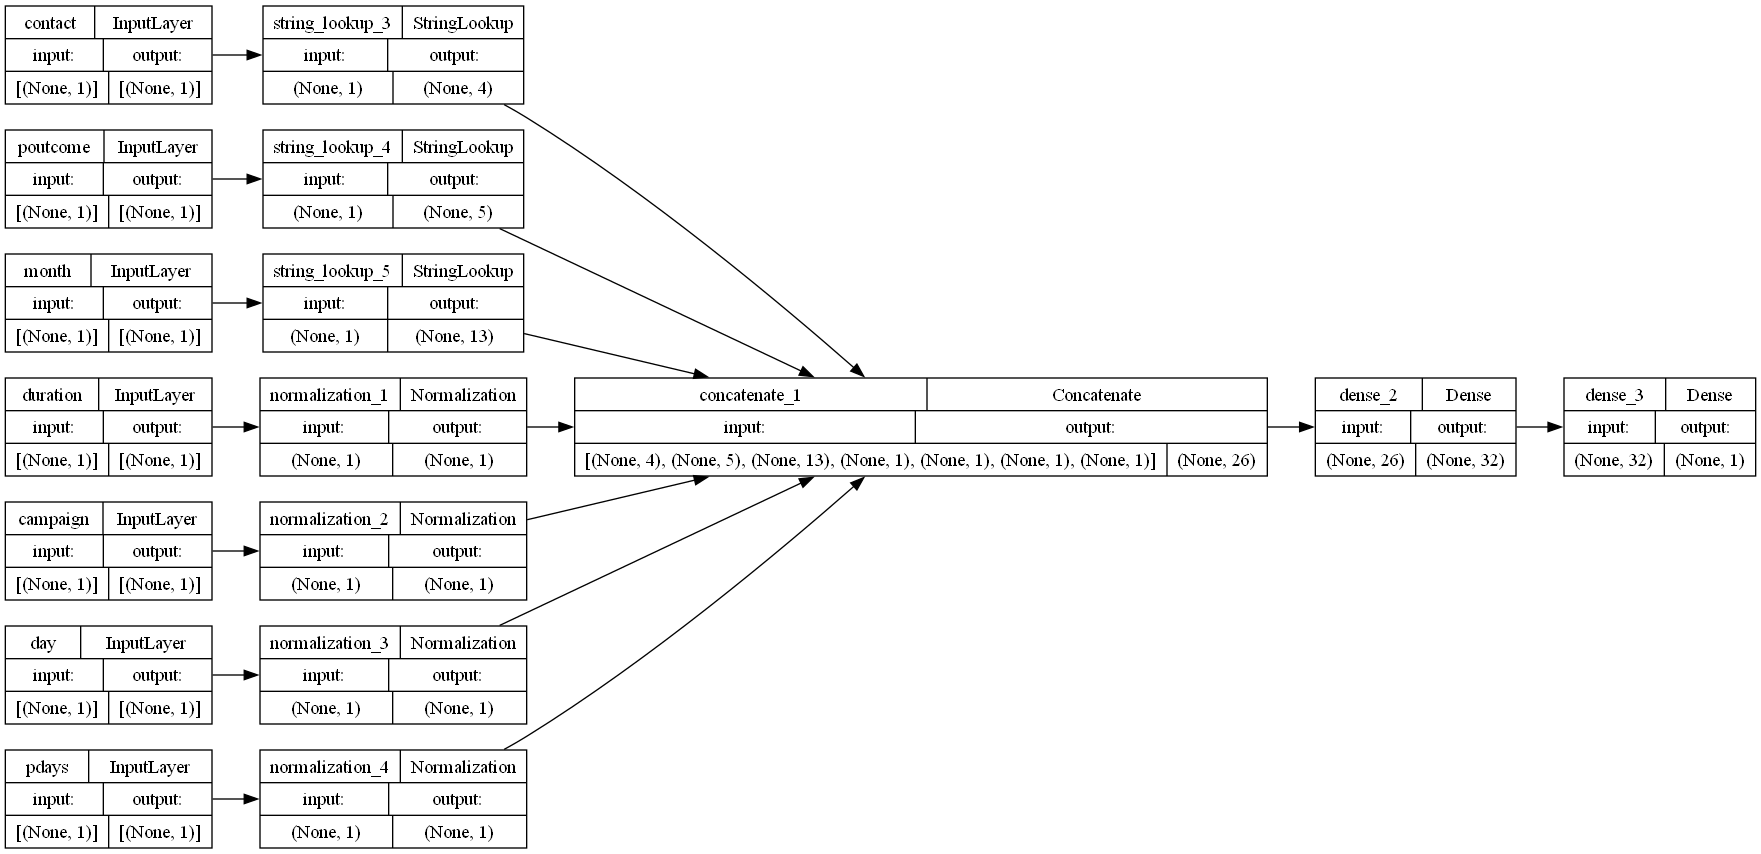

In [96]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [97]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [98]:
model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
792/792 [==============================] - 3s 2ms/step - loss: 0.4584 - accuracy: 0.8905 - val_loss: 0.2694 - val_accuracy: 0.8981
Epoch 2/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2773 - accuracy: 0.8990 - val_loss: 0.2405 - val_accuracy: 0.9030
Epoch 3/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2490 - accuracy: 0.8994 - val_loss: 0.2512 - val_accuracy: 0.9014
Epoch 4/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2457 - accuracy: 0.9025 - val_loss: 0.2512 - val_accuracy: 0.8997
Epoch 5/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2425 - accuracy: 0.9027 - val_loss: 0.2388 - val_accuracy: 0.9025
Epoch 6/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2404 - accuracy: 0.9026 - val_loss: 0.2402 - val_accuracy: 0.9036
Epoch 7/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2359 - accuracy: 0.9049 - val_loss: 0.2452 - val_accuracy: 0.9036
Epoch 

Epoch 1/50


792/792 [==============================] - 2s 2ms/step - loss: 0.2242 - accuracy: 0.9080 - val_loss: 0.2409 - val_accuracy: 0.9038
Epoch 2/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2208 - accuracy: 0.9096 - val_loss: 0.2449 - val_accuracy: 0.9038
Epoch 3/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2224 - accuracy: 0.9084 - val_loss: 0.2463 - val_accuracy: 0.8935
Epoch 4/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2210 - accuracy: 0.9085 - val_loss: 0.2413 - val_accuracy: 0.9030
Epoch 5/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2258 - accuracy: 0.9067 - val_loss: 0.2403 - val_accuracy: 0.9055
Epoch 6/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2200 - accuracy: 0.9084 - val_loss: 0.2354 - val_accuracy: 0.9036
Epoch 7/50
792/792 [==============================] - 2s 2ms/step - loss: 0.2362 - accuracy: 0.9062 - val_loss: 0.2494 - val_accuracy: 0.9044
Epoch 8/50
792/79

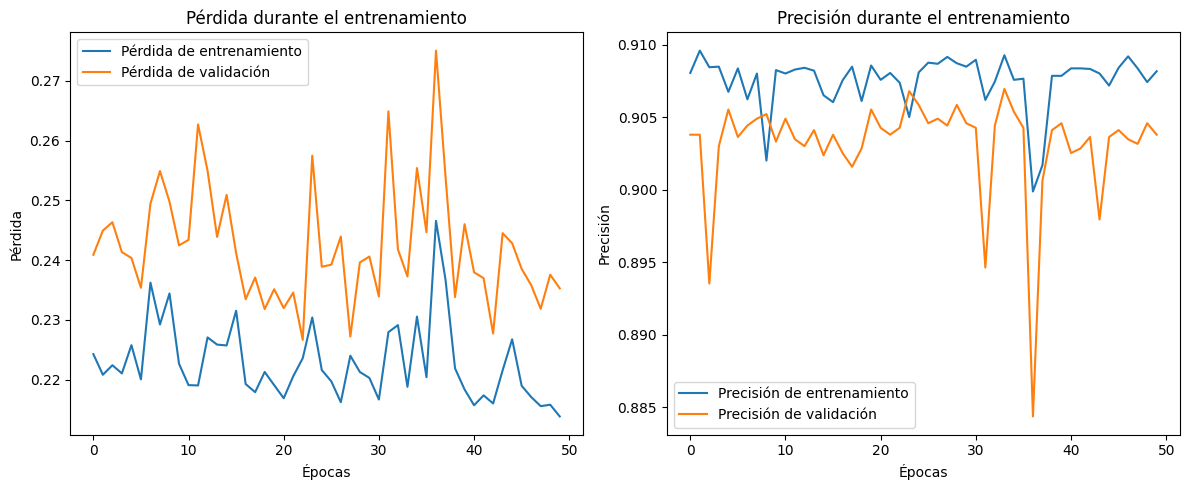

In [99]:
import matplotlib.pyplot as plt

# Suponiendo que has guardado el historial del entrenamiento
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

# Graficar pérdida (loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar precisión (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

Ejemplo de Prediccion

In [103]:
# Suponiendo que estos son los nuevos datos (df_new), deben tener las mismas columnas que tus datos de entrenamiento
data_nueva = {
    'campaign': [1, 4],        
    'day': [10, 22],           
    'contact': ['telephone', 'cellular'],       
    'poutcome': ['failure', 'success'], 
    'month': ['jan', 'dec'],         
    'duration': [20, 400],
    'pdays': [-1, 2],
    'y': [0,0]   # nos inventamos cualquier valor de y para que funcione el codigo anterior sin influir la prediccion
}


In [104]:
def predecir2(p_campaign, p_day, p_contact,p_poutcome, p_month,p_duration,p_pdays):
    
    data_nueva = {
    'campaign': [p_campaign],        
    'day': [p_day],         
    'contact': [p_contact],  
    'poutcome': [p_poutcome],       
    'month': [p_month], 
    'duration': [p_duration],   
    'pdays': [p_pdays],       
    'y': [0]  
    }
    
    
    df_new = pd.DataFrame(data_nueva)

    prueba_ds = dataframe_to_dataset(df_new)

    prueba_ds = prueba_ds.batch(batch_size)

    predicciones = model.predict(prueba_ds)

    #predicciones_binarias = (predicciones > 0.5).astype(int)
    
    return predicciones

In [105]:
print(predecir2(2,20,'cellular','failure','jan',300,-1))

1/1 [==============================] - 0s 158ms/step
[[0.2724722]]
